##Submitted by: 
**Group Name:**MI 4

**Group Members:** Anuja Negi, Debapratim Jana, Tobiasz Budzynski, Muthukumar Pandaram

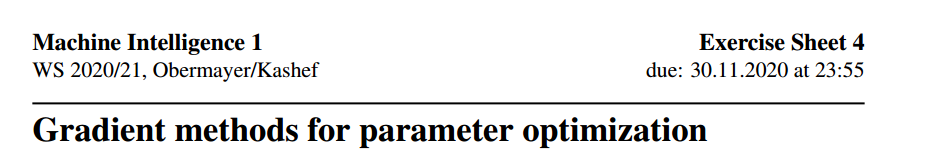

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

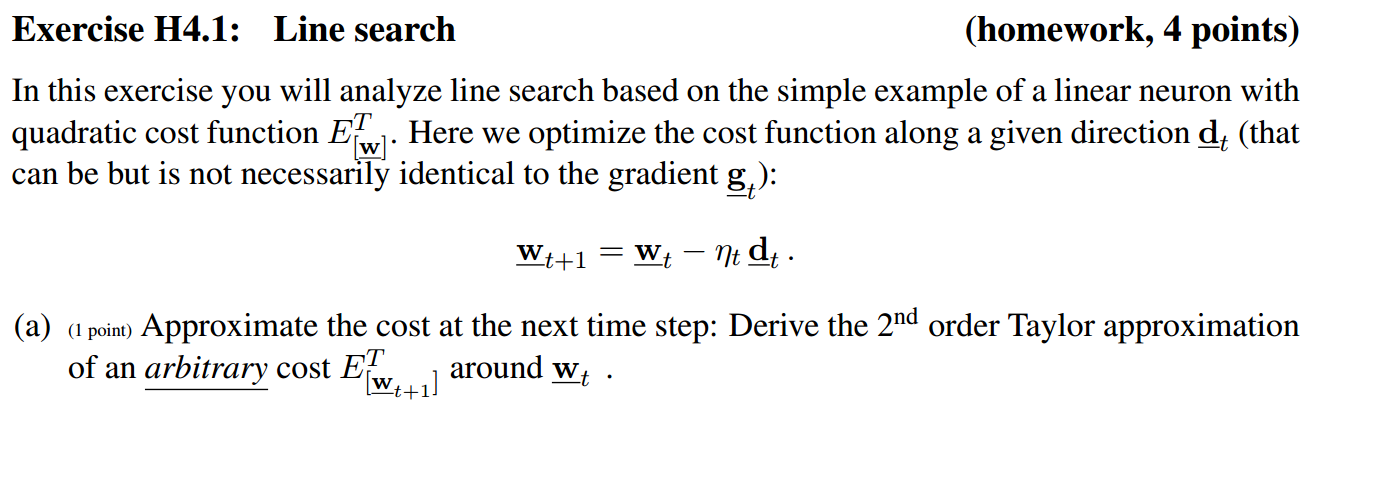



$$ E(w_{t+1}) = E(w_t) + \nabla E \cdot (-\eta_t d_t) + \frac{1}{2} (-\eta_t d_t)^T H (-\eta_t d_t) + \frac{1}{3!}E^{(3)}(w_{t})(-\eta_t d_t)...,$$
where the fourth and next terms would need to be expanded with Frechet Derivative and cubic and higher order form. \\

 Fortunately, we are interested only in first three terms of the Taylor expansion.

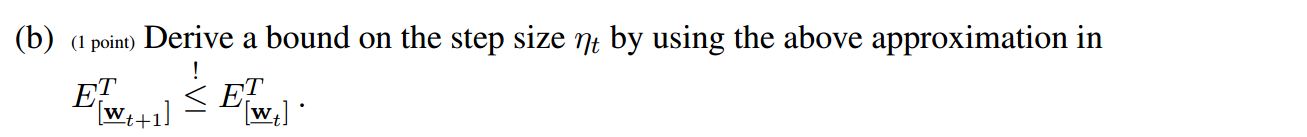

$$ \Delta E^T \leq 0 $$
$$ \Delta E^T\approx - E(w_t) + E(w_t) + \nabla E \cdot (-\eta_t d_t) + (-\eta_t d_t) H (-\eta_t d_t) $$
Using ineqality above, taking the scalar $\eta$ in front of each term and dividing by $\eta$, we get (the product with Hessiannon is non zero for non-zero $d$, because $H$ is positive definite)
$$ \eta_t \leq \frac{ \nabla E d_t}{ d_t H d_t} $$

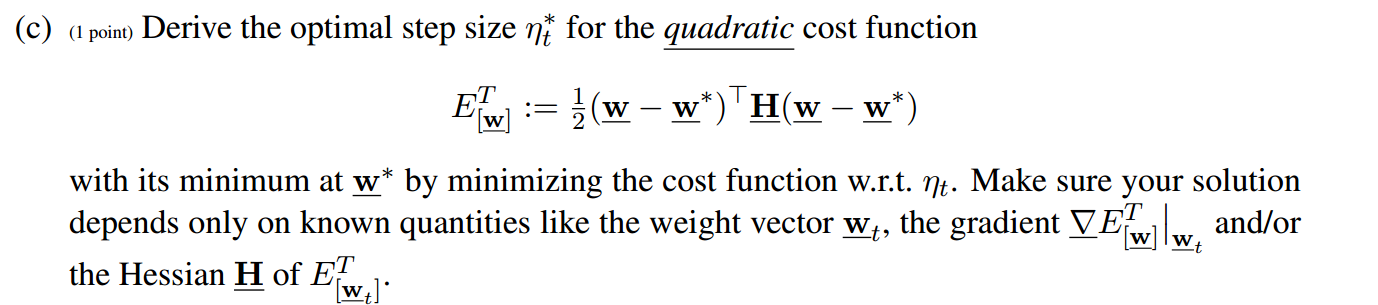

As $E^T$ has a minimum at an unknown $w^*$, it's gradient is 0 there. Taylor approximation is equal to 
$$E^T_{w_{t+1}} \approx E^T_{[w_t]} + \frac{1}{2} (w_{t+1}-w_t)^T H (w_{t+1}-w_t)$$

$$\nabla E^T_{[w_{t+1}]} = \nabla E^T_{[w_t]} +  \frac{1}{2} * 2  H  (-\eta_t d_t) \tag{@}$$
If we want in next step get as close as possible to $w^*$, we shall assume that left side of equation is $0$. Putting symbol $^*$ over $\eta$.

$$ \eta^*_t H (-d_t) = d_t.$$

To calculate $\eta \in \mathbb{R}$ from this vector equation, we can take a dot product with $d_t$ (or with $\nabla E^T_{w_t}$) from left side, to get real numbers. We can use the equality $d^Td = || d ||^2$.
$$ - \eta^*_t (\nabla E^T_{w_t})^T H (d_t) = \nabla E^T_{w_t} \cdot d_t$$

Now, there is no point of taking $d_t$ perpendicular to gradiant (don't go up!), hence the Hesian thing is non-zero (positive definite, bilinear form) and we can divide.

$$\eta^*_t  = -\frac{\nabla E^T_{w_t} \cdot d_t}{(\nabla E^T_{w_t})^T H (d_t)}$$

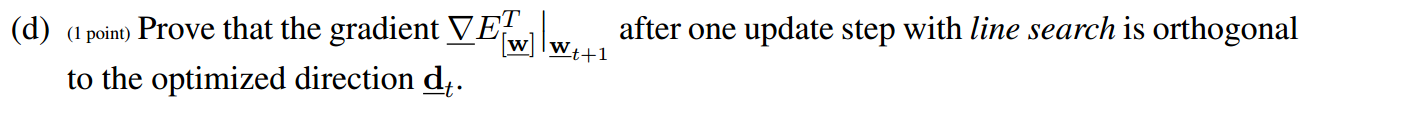

Let's check! <br>
   If such $\eta^*$ really minimalize avarage cost function $E$, the ortogonality of direction $d$ with gradient at the new point $w_{t+1}$ should hold. It would mean, that level of $E$ is tangent to direction $d$. So $w_{t+1}$ is critical. Knowing, that E is convex we would be sure of minimality. 
$$d_t \cdot \nabla E^T_{w}|_{w_{t+1}}\stackrel{?}{=} 0 $$
Using definitions of $\eta^*$, and if direction is gradient $d_t = -\nabla E^T_{w_t} = -Hw_t$ (what if it is not gradient??) and equation $(@)$, we have

$$d_t \cdot \nabla E^T|_{w_{t+1}} = d_t \cdot H w_{t+1} = $$
$$= d_t \cdot H( w_{t} + \eta^*d_t) = d_t \nabla E^T_{w_t} + \eta^* d_t^T H d_t  =  d_t \cdot d_t  - ||d_t||^2 = 0 $$

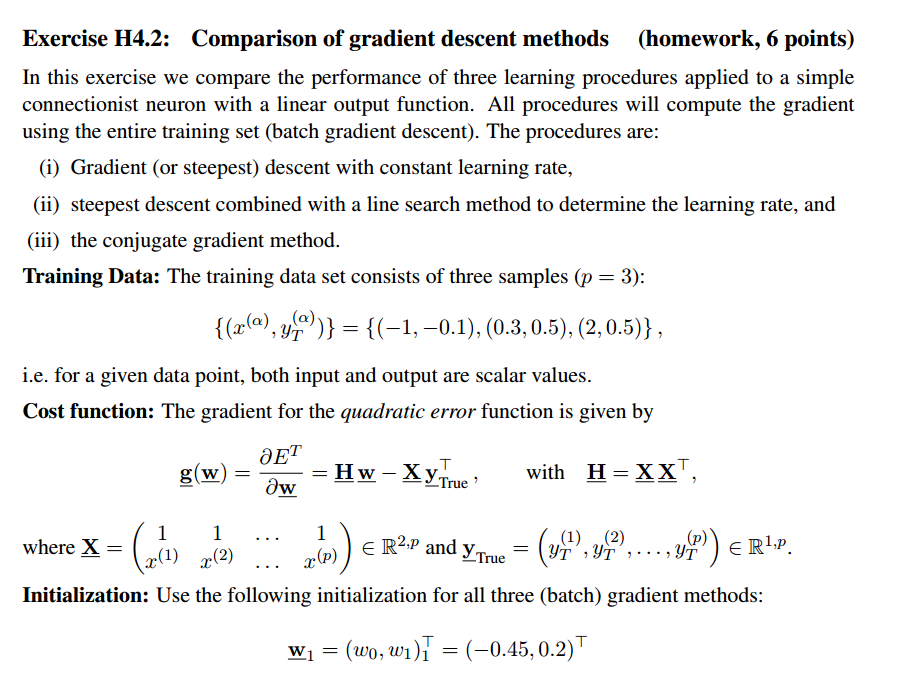

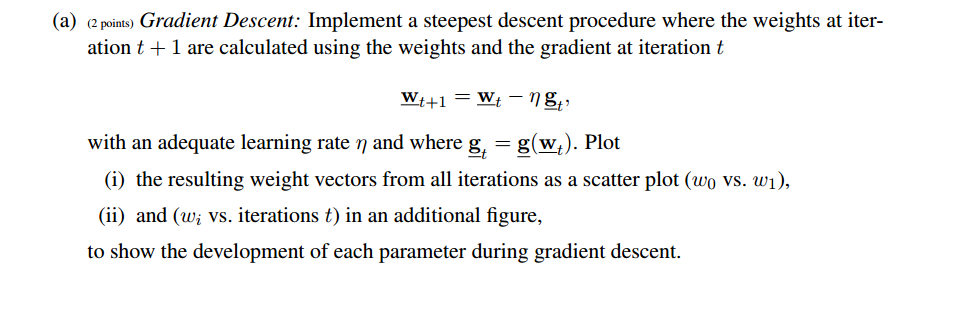

Part (**a**) : Gradient Descent 

In [2]:
# Initialise training data and weight matrix

X = np.array([ [1 ,  -1] , [1, 0.3] , [1 , 2] ]).T
Y = np.array([-0.1, 0.5, 0.5])

w_init = np.array([-0.45, 0.2]).T

In [3]:
# (a) Gradient Descent 

def gradient_descent(X, Y, w_init, max_iter, lr = 0.001):
    
    w= w_init.copy()

    mse_history=[]
    stopping_criteria=True
    w0_history = []
    w1_history = []
    iter = 0

    H = np.dot(X, X.T)

    while iter < max_iter and stopping_criteria:
        g = np.dot(H,w) - np.dot(X, Y.T)
        w = w - lr*g


        Y_pred  = np.dot(w, X)
        mse=np.square(np.subtract(Y, Y_pred)).mean()
        # print(mse)
        mse_history+=[mse]
        
        
        #stopping criterion
        if iter>0:
            mse_new=mse_history[iter]
            mse_old=mse_history[iter-1]
            if ((abs(mse_new-mse_old))/mse_old)<=0.005:
              stopping_criteria=False

        w0_history += [w[0]]
        w1_history += [w[1]]
        iter += 1


    return w0_history , w1_history, mse_history

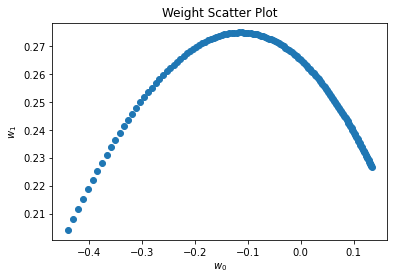

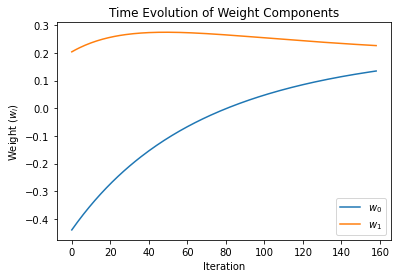

In [4]:
w0_history , w1_history, mse_history = gradient_descent(X, Y, w_init, max_iter = 1_000, lr = 0.005)

plt.scatter(w0_history , w1_history)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Weight Scatter Plot')

plt.show()

plt.plot(w0_history , label = '$w_0$')
plt.plot(w1_history , label = '$w_1$')
plt.ylabel('Weight ($w_i$) ')
plt.xlabel('Iteration')
plt.title('Time Evolution of Weight Components')
lgd = plt.legend()
plt.show()

As we can see, the weight vector components eventually stabilise when some optima (minima) has been found in the parameter weight space. 

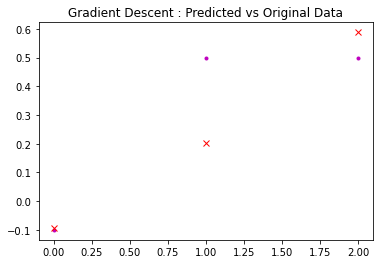

In [5]:
w_final = np.array([w0_history[-1] , w1_history[-1] ]).T

Y_pred  = np.dot(w_final, X)
plt.plot(Y, '.m' , label = 'Data')
plt.plot(Y_pred, 'xr', label = 'Predicted')
plt.title('Gradient Descent : Predicted vs Original Data')
plt.show()

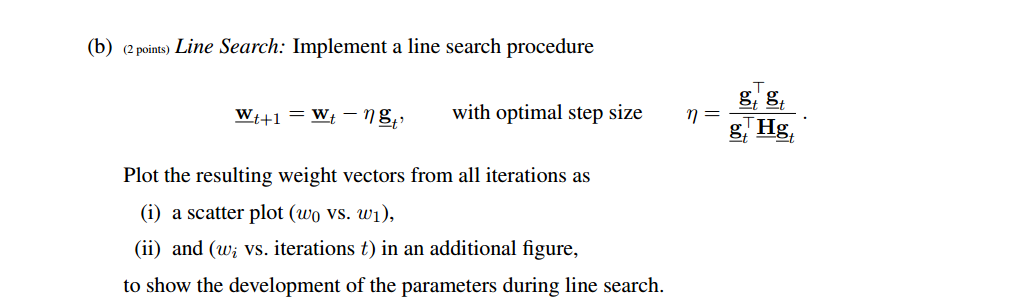

In [6]:
# (b) Line search
def line_search(X, Y, w_init, max_iter, stopping = True):
    
    w= w_init.copy()

    w0_history = []
    w1_history = []
    mse_history=[]
    iter = 0
    stopping_criteria=True

    H = np.dot(X, X.T)

    while iter < max_iter and stopping and stopping_criteria:
        g = np.dot(H,w) - np.dot(X, Y.T)
        lr = np.dot(g.T,g)/np.dot(g.T, np.dot(H, g))
        w = w - np.multiply(lr, g, dtype=np.longdouble)

        Y_pred  = np.dot(w, X)
        mse=np.square(np.subtract(Y, Y_pred)).mean()
        # print(mse)
        mse_history+=[mse]
        
        
        #stopping criterion
        if iter>0:
            mse_new=mse_history[iter]
            mse_old=mse_history[iter-1]
            if ((abs(mse_new-mse_old))/mse_old)<=0.005:
              stopping_criteria=False

        w0_history += [w[0]]
        w1_history += [w[1]]
        iter += 1


    return w0_history , w1_history, mse_history


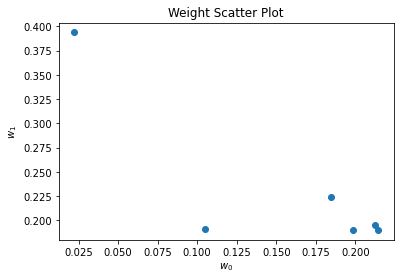

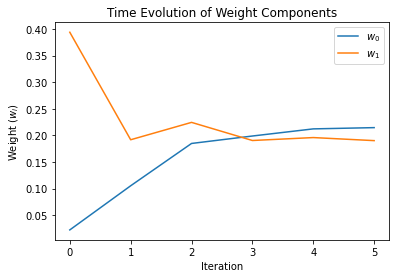

In [7]:
w0_history , w1_history, mse_history = line_search(X, Y, w_init, max_iter = 50)

plt.scatter(w0_history , w1_history)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Weight Scatter Plot')

plt.show()

plt.plot(w0_history , label = '$w_0$')
plt.plot(w1_history , label = '$w_1$')
plt.ylabel('Weight ($w_i$) ')
plt.xlabel('Iteration')
plt.title('Time Evolution of Weight Components')
plt.legend()
plt.show()

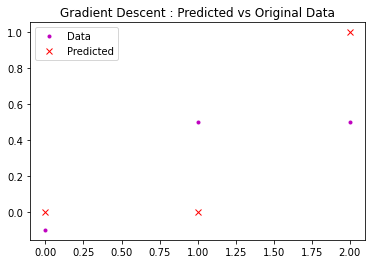

In [8]:
w_final = np.array([w0_history[-1] , w1_history[-1] ]).T

Y_pred  = np.dot(w_final, X)
plt.plot(Y, '.m' , label = 'Data')
plt.plot(Y_pred.round(), 'xr', label = 'Predicted')
plt.title('Gradient Descent : Predicted vs Original Data')
plt.legend()
plt.show()

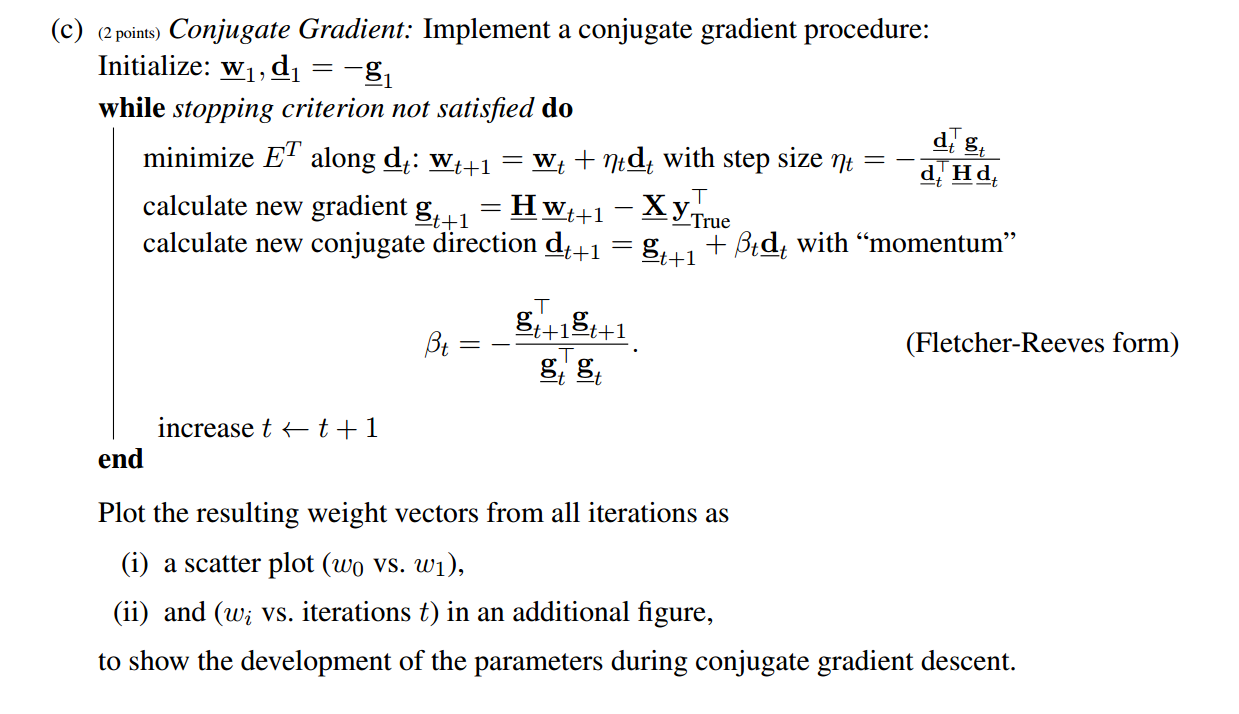

In [9]:
# (c) Conjugate Gradient
def conjugate_gradient(X, Y, w_init, max_iter, stopping = True):
    
    w= w_init.copy()

    mse_history=[]

    w0_history = []
    w1_history = []
    iter = 0
    stopping_criteria=True

    H = np.dot(X, X.T)

    while iter < max_iter and stopping and stopping_criteria:
      if iter==0:
        g_old = np.dot(H,w) - np.dot(X, Y.T)
        d=-g_old
        lr = -np.dot(d.T,g_old)/np.dot(d.T, np.dot(H, d))
        w= w + lr*d
        g_new = np.dot(H,w) - np.dot(X, Y.T)
        beta=-np.dot(g_new.T,g_new)/np.dot(g_old.T,g_old)
        d=g_new+beta*d
        g_old=g_new
      else:
        lr =-np.dot(d.T,d)/np.dot(d.T, np.dot(H, d))
        w = w + lr*d
        g_new = np.dot(H,w) - np.dot(X, Y.T)
        beta=-np.dot(g_new.T,g_new)/np.dot(g_old.T,g_old)
        d=g_new+beta*d
        g_old=g_new

      Y_pred  = np.dot(w, X)
      mse=np.square(np.subtract(Y, Y_pred)).mean()
      mse_history+=[mse]
      
      
      #stopping criterion
      if iter>0:
          mse_new=mse_history[iter]
          mse_old=mse_history[iter-1]
          if ((abs(mse_new-mse_old))/mse_old)<=0.005:
            stopping_criteria=False
               

      w0_history += [w[0]]
      w1_history += [w[1]]
      
      
      iter += 1
  
  
    return w0_history , w1_history, mse_history



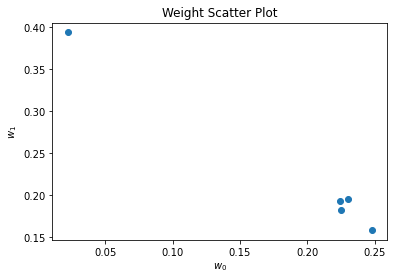

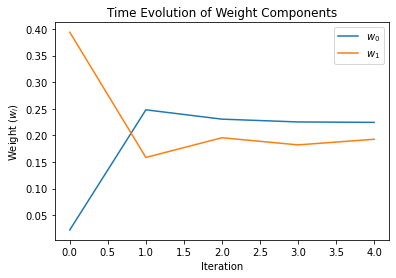

In [10]:
w0_history , w1_history, mse_history = conjugate_gradient(X, Y, w_init, max_iter = 50)

plt.scatter(w0_history , w1_history)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.title('Weight Scatter Plot')

plt.show()

plt.plot(w0_history , label = '$w_0$')
plt.plot(w1_history , label = '$w_1$')
plt.ylabel('Weight ($w_i$) ')
plt.xlabel('Iteration')
plt.title('Time Evolution of Weight Components')
plt.legend()
plt.show()

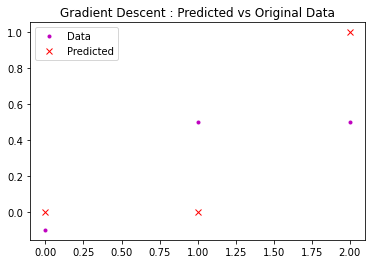

In [11]:
w_final = np.array([w0_history[-1] , w1_history[-1] ]).T

Y_pred  = np.dot(w_final, X)
plt.plot(Y, '.m' , label = 'Data')
plt.plot(Y_pred.round(), 'xr', label = 'Predicted')
plt.title('Gradient Descent : Predicted vs Original Data')
plt.legend()
plt.show()

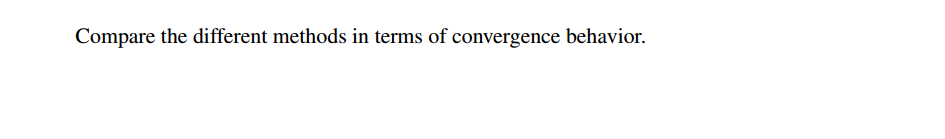

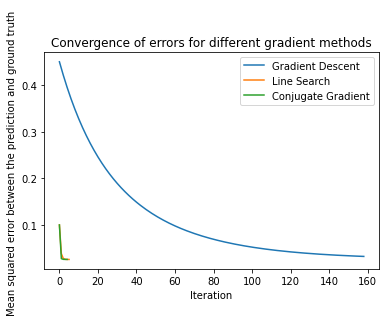

In [12]:
w0_history , w1_history, mse_history_gd = gradient_descent(X, Y, w_init, max_iter = 1_000, lr = 0.005)
w0_history , w1_history, mse_history_ls = line_search(X, Y, w_init, max_iter = 50)
w0_history , w1_history, mse_history_cg = conjugate_gradient(X, Y, w_init, max_iter = 50)

plt.plot(mse_history_gd,label='Gradient Descent')
plt.plot(mse_history_ls,label='Line Search')
plt.plot(mse_history_cg, label= 'Conjugate Gradient')
plt.ylabel('Mean squared error between the prediction and ground truth ')
plt.xlabel('Iteration')
plt.title('Convergence of errors for different gradient methods')
plt.legend()
plt.show()

It can be seen from the above plot that the line search and conjugate gradient methods help the error to converge in a very less number of iterations compared to the general gradient descent method.